In [1]:
# imports
import pandas as pd
import config
import config_func
import os
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
# acess image data
PROJECT_DIR = os.getcwd()
INPUT_DIR = os.path.join(PROJECT_DIR, config.INPUT_DIR) # path of input directory
IMAGES_DIR = os.path.join(INPUT_DIR, config.IMAGES_ACESS)


In [3]:
# define paths for all classes (stroma, tumor, mucosa, empty, lympho, adipose, complex, debris)
STROMA_FOLDER = os.path.join(IMAGES_DIR, config.STROMA_DIR, config.IMAGES_REGEX)
TUMOR_FOLDER = os.path.join(IMAGES_DIR, config.TUMOR_DIR, config.IMAGES_REGEX)
MUCOSA_FOLDER = os.path.join(IMAGES_DIR, config.MUCOSA_DIR, config.IMAGES_REGEX)
EMPTY_FOLDER = os.path.join(IMAGES_DIR, config.EMPTY_DIR, config.IMAGES_REGEX)
LYMPHO_FOLDER = os.path.join(IMAGES_DIR, config.LYMPHO_DIR, config.IMAGES_REGEX)
ADIPOSE_FOLDER = os.path.join(IMAGES_DIR, config.ADIPOSE_DIR, config.IMAGES_REGEX)
COMPLEX_FOLDER = os.path.join(IMAGES_DIR, config.COMPLEX_DIR, config.IMAGES_REGEX)
DEBRIS_FOLDER = os.path.join(IMAGES_DIR, config.DEBRIS_DIR, config.IMAGES_REGEX)
LIST_CLASSES_FOLDER = [
    STROMA_FOLDER, TUMOR_FOLDER, MUCOSA_FOLDER, EMPTY_FOLDER,
    LYMPHO_FOLDER, ADIPOSE_FOLDER, COMPLEX_FOLDER, DEBRIS_FOLDER
]


In [4]:
# get images from all folders
# classes targets --> 0: Stroma, 1: Tumor, 2: Mucosa, 3: Empty, 4: Lympho, 5: Adipose, 6: Complex, 7: Debris
images = []
labels = []
for i, j in zip(LIST_CLASSES_FOLDER, range(config.NUMBER_CLASSES)):
    images.append(config_func.getImages(i))
    labels.extend([j for i in range(len(images[j]))])


In [5]:
# flatten images list
images = [path for sublist in images for path in sublist]


In [6]:
# construct DataFrame with two columns: (image_path, target)
data = pd.DataFrame(
    list(zip(images, labels))
    ,columns=[config.IMAGE_PATH, config.TARGET])


In [7]:
# data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  5000 non-null   object
 1   target      5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [8]:
# shape of data --> number of images
data.shape


(5000, 2)

In [9]:
# check columns of DataFrame
data.columns


Index(['image_path', 'target'], dtype='object')

In [10]:
# check null values
data.isnull().sum()


image_path    0
target        0
dtype: int64

In [11]:
# check for duplicated values
exist_duplicated = data.duplicated().any()
exist_duplicated


False

In [12]:
# how many classes exist
number_classes = data[config.TARGET].unique()
sorted(number_classes)


[0, 1, 2, 3, 4, 5, 6, 7]

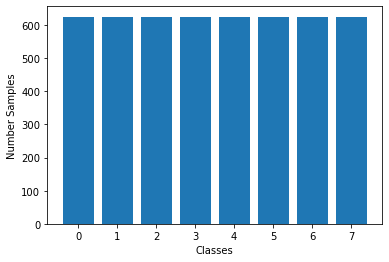

In [14]:
# plot samples per class
x_pos = np.arange(len(number_classes))
samples_per_class = [
    data.loc[data.target == 0, 'target'].count(),
    data.loc[data.target == 1, 'target'].count(),
    data.loc[data.target == 2, 'target'].count(),
    data.loc[data.target == 3, 'target'].count(),
    data.loc[data.target == 4, 'target'].count(),
    data.loc[data.target == 5, 'target'].count(),
    data.loc[data.target == 6, 'target'].count(),
    data.loc[data.target == 7, 'target'].count(),
]
plt.bar(x_pos, samples_per_class, align='center')
plt.xticks(x_pos, number_classes)
plt.xlabel('Classes')
plt.ylabel('Number Samples')
plt.show()


In [15]:
# get number of samples by class
samples_per_class


[625, 625, 625, 625, 625, 625, 625, 625]

In [ ]:
# definition of new DataFrame, with RGB pixels (128*128) and label



In [ ]:
#print some images per class
